Dataset anallysis of mental state (sober or high) vs performance in fortntie
https://www.kaggle.com/datasets/johnharshith/fortnite-statistics-corresponding-to-mental-state

In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fortnite_df = pd.read_csv('Datasets/FortniteStatistics.csv', sep=',')

fortnite_df

,Date,Time of Day,Placed,Mental State,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures
0,4/10,6:00 PM,27,sober,2,0,0,23%,14,2,271.08,20,20,272,331,621
1,4/10,6:00 PM,45,sober,1,2,0,30%,19,1,396.73,123,30,247,444,998
2,4/10,6:00 PM,38,high,3,0,0,30%,32,1,607.80,71,60,176,322,1109
3,4/10,7:00 PM,30,high,1,3,0,18%,19,1,714.16,244,10,238,330,4726
4,4/10,7:00 PM,16,high,3,1,1,58%,42,18,1140.00,584,150,365,668,2070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,4/15,6:00 PM,22,high,3,3,1,34%,78,5,361.31,0,0,329,362,990
76,4/15,10:00 PM,15,sober,3,0,1,36%,83,13,336.46,175,10,223,1014,2434
77,4/15,11:00 PM,34,sober,2,2,1,53%,61,3,314.10,60,0,106,658,415
78,4/15,11:00 PM,15,sober,1,1,1,45%,30,0,1170.00,99,80,151,286,553


todo: 

is it better to play fortnite while high or sober, justify taking drugs based on final results




Brief

expected to do in a jpyter ntebook
make sue of the markdown cells to explain what it is i am doing talk about where the dat is from and the goal of the project,to give it a bit of context, ptetend it is an actual predentation, or something for other people to read, make the notes good

load packages, expected to use pandas and numpy, do some plots with plotly express as we have been using it

Load in the datset, it will be a CSV from kaggle, load it into python and the expectation is an exloration and guide through the data, tell features & interesting things


Make a description of the data, what the columsn are, what does it tell us, how many observations and the years it is from, give some contet for the data

next explore the data, print out the data/head of the data and explore it
look at types, make modifications as needed (like date to datetime data etc) look at the shapes and size, use the describe function to get an averview of the numeric data, check out averges and quantiles, if the data is catgorical, look at if you can coun the numbr of things in different colums

then do some plotting, bar charts, to see number of entries as things vary
then if there are questions, ansert the questions that you find as you go through it, write down question and thought process as moving through th dataset, use this to guide the rest of the project, You dont need to answer them all but it shows that you have the throught process and ideas, even if you cant find the tools to work through it

can look at some more sophisticated plots, like spliitng bar chart by country (plotly is interactive) this allows easy comparison, can zoom in out etc

look at histograms, they give an idea of data distribution, we looked at changing histogram bins to give more fine grained data that an lead to seeing more interesting points, but can also be too specific to loose the overall patterns, or have a small amount of bins, thatr can give a good patten ovrview but can loose the detail, ind the optimal bins, explain why its good bad, explain what the histrogram shows you

what is this plot showing, why have you chosen this plot, why have you chosen ZYX from dataset to compare, and what you have learnt fromm it 
this project is about using the tools and the abilities we have lernt over the past few weeks & notepads to demonstrate that we can do python

the real value is my ability to demonstrate that i can think hrouhg a problem, knw how to work through and expore data and can demonstrate the thought process
showing you knw hwo to use tools to answer questions and investigate things is whats useful, explian your code and choice of dataset

it is expected to be a bit longer investicgate mor epots, calculate more avergaes, 

if you want to take it further because you are a nerd
you can introduce linear regression choose a colum to predict based on other coumsn and look at how well the mkodel performs, comapre it to over models and columsn
if its appropriate you can build a simulator and compare that to your data (see today's proejct) if you want to use an external fucntion like GPT integrate it into your solutions, go wild

the main thing needed is load data, show plots, describe and explain data depends how much of a nerd u want to be

you can add a conclusion if it starts with a question e.g which X are the best predictors of X
conclude X is best blah blah
mainly want to see through process of how you perosnally manage the data can use research if you find questions you want to answer, this will show your research skills off, obviously cite your sources,






/r/dataisbeautiful
seaborn for pretty but non interactive graphs, w used it a while ago it will be somewhere
check documentation for packages if needed

26th feb



In [3]:
fortnite_df['Date And Time'] = pd.to_datetime(fortnite_df['Date'] + ' ' + fortnite_df['Time of Day'], format='%m/%d %I:%M %p')
fortnite_df['Date And Time'] = fortnite_df['Date And Time'].dt.strftime('%d-%m %I:%M %p')
fortnite_df.rename(columns={'Time of Day': 'Time'}, inplace=True)
fortnite = fortnite_df.drop('Date', axis=1) 
# since the date axis has been converted and merged , it can be dropped as it is no longer needed
# we will keep the original time of day column as it is useful for the analysis, but we will rename it to time 
#as it is easier to understand and reference

In [4]:
fortnite.shape
# 80 rows, 16 columns

(80, 16)

In [5]:
fortnite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  80 non-null     object 
 1   Placed                80 non-null     int64  
 2   Mental State          80 non-null     object 
 3   Eliminations          80 non-null     int64  
 4   Assists               80 non-null     int64  
 5   Revives               80 non-null     int64  
 6   Accuracy              80 non-null     object 
 7   Hits                  80 non-null     int64  
 8   Head Shots            80 non-null     int64  
 9   Distance Traveled     80 non-null     float64
 10  Materials Gathered    80 non-null     int64  
 11  Materials Used        80 non-null     int64  
 12  Damage Taken          80 non-null     int64  
 13  Damage to Players     80 non-null     int64  
 14  Damage to Structures  80 non-null     int64  
 15  Date And Time         80 

In [6]:
indexGraph = px.histogram(fortnite, y=fortnite_df.index, x='Date And Time', title='Display of Dataset', histfunc='count', )
indexGraph.show()

This is a bssic overview of the dataset, the histogram displays the amount of entries accross the 5 days of data at each relvent time plot, you can see that the most amount of entries happened on the 14th of April at 1pm, whereas there are three entires that only contain one entry, at 1pm on the 11th of april, 3pm on the 11th of april and 10pm on the 15th of april


Mental State | Game Position, Split into Two

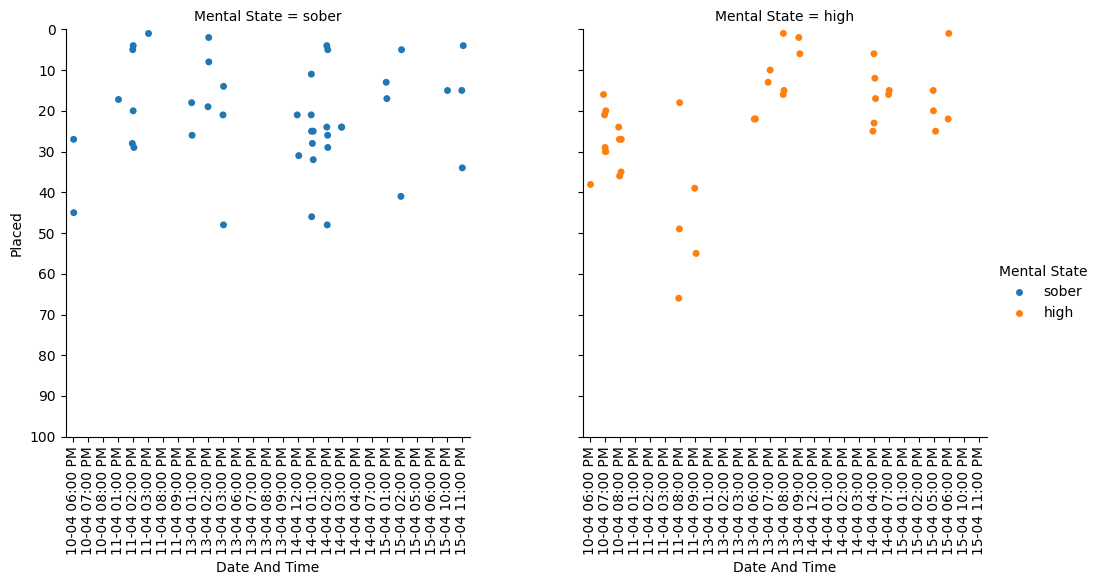

In [7]:
compareGraph = sns.catplot(x="Date And Time", col="Mental State", y="Placed", hue="Mental State", data=fortnite)
compareGraph.set(ylim=(0, 100))
compareGraph.set_xticklabels(rotation=90)
compareGraph.set(yticks=np.arange(0, 101, 10))
plt.gca().invert_yaxis()

These graphs seperate the two 'Mental State' Columns and plot the games played throughout the timeframe the dataset was taken ( 5 days), it shows the position player came at the end of thier game, for context, this game is out of 100 players alltogether. and the y axis has been inverted, as for the sake of this data, the closer to 0 you are is better (note the closest to zero you can be is 1,)


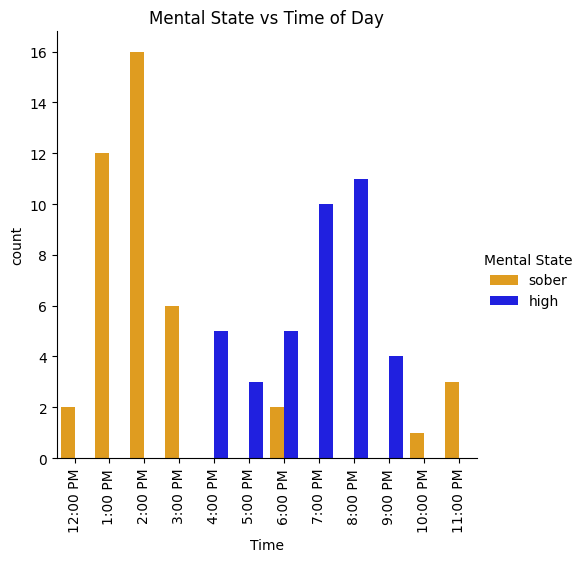

In [ ]:
# mental state vs time of day

fortnite['Time'] = pd.Categorical(fortnite['Time'], categories=[
    '12:00 PM', '1:00 PM', '2:00 PM', '3:00 PM', '4:00 PM', '5:00 PM', '6:00 PM', '7:00 PM', '8:00 PM', '9:00 PM', '10:00 PM', '11:00 PM'], ordered=True)

timeMental = sns.catplot(x="Time", hue="Mental State", kind="count", data=fortnite, palette={'sober': 'orange', 'high': 'blue'})
timeMental.set_xticklabels(rotation=90)
plt.title('Mental State vs Time of Day')
plt.show()


this graph displays the times of day players who were involved in the data collection of this dataset were high/sober, there is a very obvious timeframe of where high and sober players entered and tookpart in the game throughtout the afternoon/evening.  You can also see where the high players dropped off and had to go to bed

so we can get into the gritty part of pro gamer stats to find the best way to optimally play video games

In [ ]:
eliminationsGraph = px.histogram(fortnite, y='Eliminations', color='Mental State', title='Mental State vs Eliminations', barmode='group', nbins=10, color_discrete_map={'sober': 'orange', 'high': 'blue'})
eliminationsGraph.update_traces(marker_line_width=2, marker_line_color='black')
eliminationsGraph.show()


In [ ]:
fortnite.sort_values(by='Accuracy', inplace=True)

accuracyGraph = px.histogram(fortnite, y='Accuracy', color='Mental State', title='Mental State vs Accuracy', nbins=20, color_discrete_map={'sober': 'orange', 'high': 'blue'})
accuracyGraph.update_traces(marker_line_width=2, marker_line_color='black')
accuracyGraph.update_layout(yaxis_title='Accuracy (%)')
accuracyGraph.show()

In [ ]:
fortnite['Accuracy'] = fortnite['Accuracy'].astype(str)
fortnite['Accuracy'] = fortnite['Accuracy'].str.rstrip('%').astype('float')

fortnite.sort_values(by='Accuracy', inplace=True)

accuracyHeadshots = px.bar(
    fortnite, 
    x='Accuracy', 
    y='Head Shots', 
    color='Mental State', 
    title='Mental State Accuracy vs Head Shots', 
    barmode='group', 
    labels={'Accuracy': 'Accuracy %'}, 
    width=1000, 
    height=600,
    color_discrete_map={'sober': 'orange', 'high': 'blue'}
)
accuracyHeadshots.update_traces(marker_line_width=2, marker_line_color='black', width=1.5)
accuracyHeadshots.show()


In [12]:
top_10 = fortnite.nsmallest(10, 'Placed')
top_10

,Time,Placed,Mental State,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures,Date And Time
74,6:00 PM,1,high,4,5,0,16.0,35,3,4460.0,941,350,182,997,5787,15-04 06:00 PM
38,8:00 PM,1,high,6,3,1,17.0,46,7,3830.0,1907,530,193,1308,18026,13-04 08:00 PM
20,3:00 PM,1,sober,7,0,0,25.0,63,9,3320.0,541,530,180,1399,17151,11-04 03:00 PM
30,2:00 PM,2,sober,8,0,1,17.0,34,7,3790.0,3002,1740,321,1166,10594,13-04 02:00 PM
41,9:00 PM,2,high,6,2,0,27.0,54,5,4050.0,2553,680,400,1383,4945,13-04 09:00 PM
53,2:00 PM,4,sober,5,3,1,16.0,38,4,3220.0,2215,410,158,1081,8810,14-04 02:00 PM
15,2:00 PM,4,sober,5,4,4,20.0,35,3,3230.0,715,420,200,894,9494,11-04 02:00 PM
79,11:00 PM,4,sober,5,2,2,42.0,52,0,3550.0,850,450,436,724,1377,15-04 11:00 PM
69,2:00 PM,5,sober,6,3,0,11.0,29,3,3350.0,421,230,366,764,11077,15-04 02:00 PM
16,2:00 PM,5,sober,3,6,1,17.0,32,11,2780.0,384,370,264,787,3589,11-04 02:00 PM


In [19]:
top10 = px.histogram(
    top_10,
    y='Placed',
    color='Mental State',
    title='Top 10 Players Mental State',
    barmode='group',
    opacity=0.75,
    color_discrete_map={'sober': 'orange', 'high': 'blue'},
    nbins=5,
    histfunc='count'
)
top10.update_traces(marker_line_width=2, marker_line_color='black')
top10.update_layout(
    yaxis=dict(range=[0, 10]),
    xaxis=dict(title='count')
)
top10.show()

This graph shows the amount of players & positioning in the final top 10 scorebaord of the video game

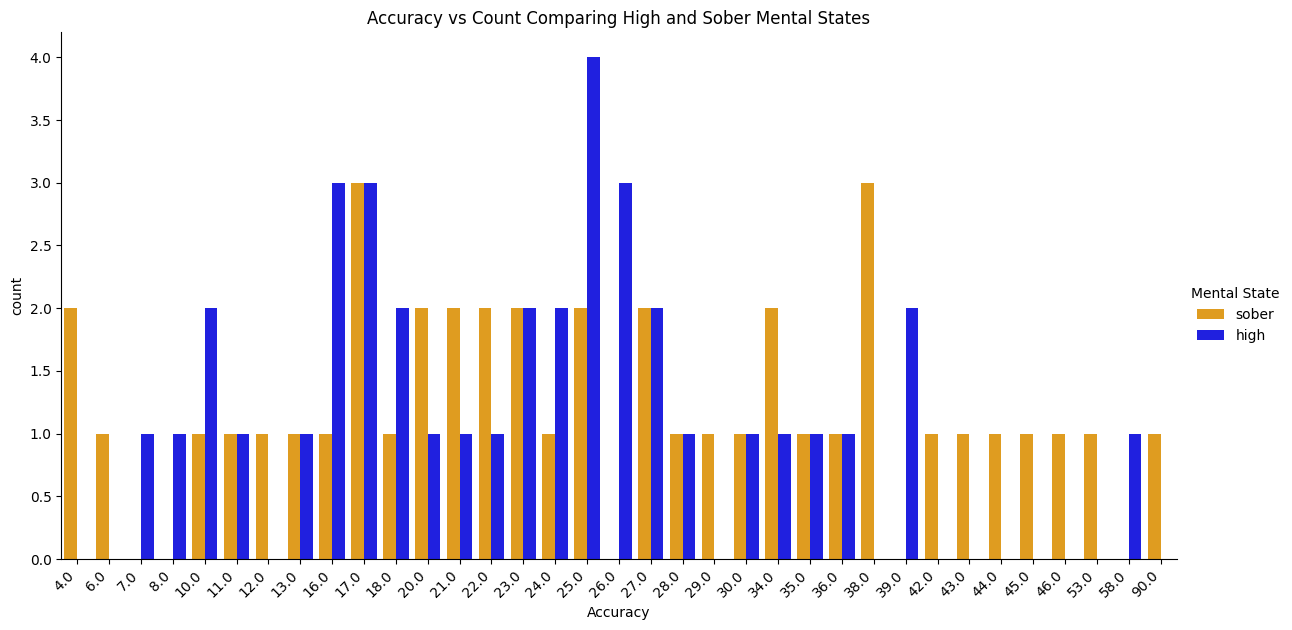

In [ ]:
accuracy = sns.catplot(
    x='Accuracy', 
    hue='Mental State', 
    kind='count', 
    data=fortnite, 
    palette={'sober': 'orange', 'high': 'blue'},
    height=6, 
    aspect=2
)
accuracy.set_xticklabels(rotation=45, ha='right')
plt.title('Accuracy vs Count Comparing High and Sober Mental States')
plt.show()